<a href="https://colab.research.google.com/github/nhanhd06/Hotel-Booking-Demand-Analyst/blob/master/Hotel_Booking_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# download the excel dataset from GitHub
!wget https://github.com/nhanhd06/Hotel-Booking-Demand-Analyst/raw/master/hotel_bookings.xlsx
!ls -ahl

--2021-10-03 00:44:58--  https://github.com/nhanhd06/Hotel-Booking-Demand-Analyst/raw/master/hotel_bookings.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nhanhd06/Hotel-Booking-Demand-Analyst/master/hotel_bookings.xlsx [following]
--2021-10-03 00:44:58--  https://raw.githubusercontent.com/nhanhd06/Hotel-Booking-Demand-Analyst/master/hotel_bookings.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15387291 (15M) [application/octet-stream]
Saving to: ‘hotel_bookings.xlsx.1’

hotel_bookings.xlsx 100%[===================>]  14.67M  --.-KB/s    in 0.09s   

2021-10-03 00:44:58 (171 MB/s) - 

In [ ]:
# read/import from the excel dataset
path = "hotel_bookings.xlsx"
data = pd.read_excel(path)
data_back_up = data

# show data shape
data.shape

(119390, 32)

In [ ]:
# declare global values
global total
global children_values
global country_values

In [ ]:
# show 10 top data output and its columns
display(data.head(10))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
# <-- Data Cleaning -->>

# checking whether any column of this dataset has null value or not => Three columns has null value - country, agent, company, and children
data.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [ ]:
# check for summary of column Country 
data['country'].describe()

count     118902
unique       177
top          PRT
freq       48590
Name: country, dtype: object

In [ ]:
# check all available Country values => Country PRT has high number - 40 percent compared to other country 48590 vs 12129 
country_values = data['country'].value_counts(dropna=False)
display(country_values)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
CYM        1
KIR        1
SLE        1
BDI        1
NAM        1
Name: country, Length: 178, dtype: int64

In [ ]:
# calculate PRT Value represented how many percent of country value
country_total = country_values[0]
display(country_total)
total = data.shape[0]
display(total)
print("Percentage of PRT value in country column = %s " % ((country_total / total) * 100))

48590

119390

Percentage of PRT value in country column = 40.69855096741771 


In [ ]:
# display all country columns with null value
display(data[data['country'].isnull()])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,0.0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65909,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65910,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,0.0,0,BB,NaN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


In [ ]:
# based on research, lead time column would determine how long and often people from one would make reservation and come
# even compared lead time with extremely low - 10 => PRT still shows the most
data[data['lead_time'] <= 10]['country'].value_counts(dropna=False)

PRT    11596
ESP     2279
FRA     1652
GBR     1234
DEU      708
       ...  
AIA        1
BOL        1
VNM        1
SUR        1
COM        1
Name: country, Length: 132, dtype: int64

In [ ]:
# since based on summary of country column, using mode would be best solution because even compared between lead time and country column, PRT still takes the lead no matter what 
mode = data.country.mode()
print("Most highest country = %s" % mode.to_string())

Most highest country = 0    PRT


In [ ]:
# changing any na value in country to any country with largest incoming visitor and check country column again for any null value
data['country'] = data['country'].fillna(mode.to_string())
data['country'].isnull().sum()

0

In [ ]:
# check for summary of column Agent
data['agent'].describe()

count    103050.000000
mean         86.693382
std         110.774548
min           1.000000
25%           9.000000
50%          14.000000
75%         229.000000
max         535.000000
Name: agent, dtype: float64

In [ ]:
# check all available Agent values => Agent ID 9.0 has highest amount and next second is No Agent 
data['agent'].value_counts(dropna=False)

9.0      31961
NaN      16340
240.0    13922
1.0       7191
14.0      3640
         ...  
117.0        1
294.0        1
352.0        1
158.0        1
472.0        1
Name: agent, Length: 334, dtype: int64

In [ ]:
# check what percent of NaN value represents on this Agent Column
agent_total = data['agent'].isnull().sum()
display(agent_total)
total = len(data['agent'])
display(total)
print("Percentage of nan value in company column = %s " % ((agent_total / total) * 100))

16340

119390

Percentage of nan value in company column = 13.686238378423655 


In [ ]:
# Based on the data summary, min and max values are extremely wide but upon inspected the meaning of this column, it looks like that number represents Agent ID who helps to book the reservation

# As a result, it makes sense to drop this column since the result would be mainly about predicting cancallation for upcoming months and it doesn't matter agent helps to book the reservation or not
data = data.drop(['agent'], axis=1)

In [ ]:
# check for summary of column Company
data['company'].describe()

count    6797.000000
mean      189.266735
std       131.655015
min         6.000000
25%        62.000000
50%       179.000000
75%       270.000000
max       543.000000
Name: company, dtype: float64

In [ ]:
# check all available Company values
data['company'].value_counts(dropna=False)

NaN      112593
40.0        927
223.0       784
67.0        267
45.0        250
          ...  
318.0         1
212.0         1
35.0          1
489.0         1
461.0         1
Name: company, Length: 353, dtype: int64

In [ ]:
# Nah values is way too many and represents about 94 percent of this column plus this column is associated with agent column => Who the agent is belong with 
# Since Agent Column is gone, decide to drop this column as well 
company_total = data['company'].isnull().sum()
display(company_total)
display(total)
print("Percentage of NaN value in company column = %s " % ((company_total / total) * 100))

112593

119390

Percentage of NaN value in company column = 94.30689337465449 


In [ ]:
# drop this company column as well
data = data.drop(['company'], axis=1)

In [ ]:
# check for summary of column Children
data['children'].describe()

count    119386.000000
mean          0.103890
std           0.398561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64

In [ ]:
# check all available Children values
children_values = data['children'].value_counts(dropna=False)
display(children_values)

0.0     110796
1.0       4861
2.0       3652
3.0         76
NaN          4
10.0         1
Name: children, dtype: int64

In [ ]:
children_total = children_values[0]
display(children_total)
display(total)
print("Percentage of 0.0 value in column children = %s " % ((children_total / total) * 100))

110796

119390

Percentage of 0.0 value in column children = 92.8017421894631 


In [ ]:
# since based on summary of column Children, no children - 0.0 is about 92 => Decided to use mode = 0.0 to fill in missing value since it represents 92 % of data
mode = data.children.mode()
print("Mode of children column = %s " % mode)

Mode of children column = 0    0.0
dtype: float64 


In [ ]:
data['children'] = data['children'].fillna(float(mode))
data['children'].isnull().sum()

0

In [ ]:
# check all column data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

In [ ]:
# upon inspected the data with float64, all of those columns has decimal number only but not float => Convert them to integer instead
data[['children', 'adr']] = data[['children', 'adr']].astype('int64')

# check all column data types again 
data.info()

# <-- End Data Cleaning -->>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  int64  

In [ ]:
# <-- Data Analysis Using Exploratory -->>

# Analyst 1 = Calculate the percentage of cancel and non cancel reservations

# Create a function which would take in column that contains different unique values
# Count each of them => Output percentage of those values => Each represents how many percent of entire input column data
def get_percentage(column):

  column = column.value_counts()
  x = column.index
  y = column/column.sum() * 100
  
  return x.values, y.values

In [ ]:
# In order to calculate the desired output, input the column - is_canceled into get_percentage function
# Would return two value names and their percentage occupied in this data 
value, percentage = get_percentage(data['is_canceled'])

# Output the percentage of cancel and non cancel reservations
for i in range(len(value)):
  if (value[i] == 1):
    print("Reservation Percentage For Cancel Reservation - %s = %s" % (value[i], percentage[i]))
  else:
    print("Reservation Percentage For Non-Cancel Reservation - %s = %s" % (value[i], percentage[i]))

Reservation Percentage For Non-Cancel Reservation - 0 = 62.958371722924866
Reservation Percentage For Cancel Reservation - 1 = 37.041628277075134


In [ ]:
# Analyst 2 = Calculate reversation percentage between Resort Hotel and City Hotel

# Make a new data with Is Canceled being 0 => Non-Cancel Reservations
data_not_canceled = data[data['is_canceled'] == 0]

# show data shape
data_not_canceled.shape

(75166, 30)

In [ ]:
# Showed Top Non-Cancel Reservation Data
display(data_not_canceled.head())

In [ ]:
# In order to calculate the percentage, input the new data column - hotel which is already filtered with non-canceled reservations into get_percentage function
# Would return two value index names and the percentage of both hotels having reservations in this data
value, percentage = get_percentage(data_not_canceled['hotel'])

# Output the percentage of reservations for both Resort Hotel and City Hotel
for i in range(len(value)):
  print("Reservation Percentage For - %s = %s" % (value[i], percentage[i]))

Reservation Percentage For - City Hotel = 61.50121065375303
Reservation Percentage For - Resort Hotel = 38.49878934624697


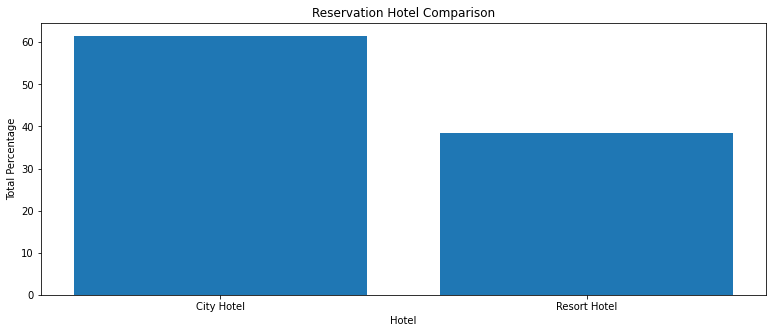

In [ ]:
# Plot the bar graph to show the result => City Hotel is the one who has the most booking reservation
plt.figure(figsize = (13,5))
plt.bar(value, percentage)
plt.ylabel("Total Percentage")
plt.xlabel("Hotel")
plt.title("Reservation Hotel Comparison")
plt.show()

In [ ]:
# Analyst 3 = Calculate reversation percentage of each year

# Using the same data set - data_not_cancelled based on arrival data year column => Input into get_percentage function
# Would return value index names of each year and the percentage of those years is accounted for entire data 
value, percentage = get_percentage(data_not_canceled['arrival_date_year'])

# Output the percentage of each year with its percentage
for i in range(len(value)):
  print("Reservation Percentage For Year - %s = %s" % (value[i], percentage[i]))

Reservation Percentage For Year - 2016 = 48.386238458877685
Reservation Percentage For Year - 2017 = 33.1825559428465
Reservation Percentage For Year - 2015 = 18.431205598275817


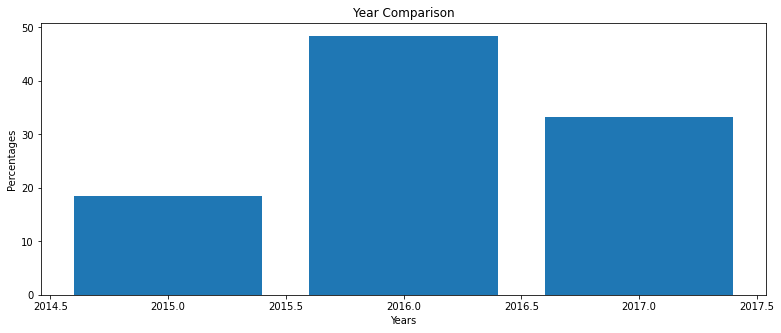

In [ ]:
# Plot the bar graph to show the result => 2016 has the most amount of reservation bookings

plt.figure(figsize = (13,5))
plt.bar(value, percentage)
plt.ylabel("Percentages")
plt.xlabel("Years")
plt.title("Year Comparison")
plt.show()

In [ ]:
# Analyze 4 = The relationship between cancel column with other columns to see what trend people would show => They might intend to cancel reservation later

# Based on the correlation output relationship of is_canceled column with other charts = lead_time, total_of_special_requests, required_car_parking_spaces, booking changes, and previous_cancellations

correlation = data.corr()["is_canceled"]
correlation.abs().sort_values(ascending=False)[1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047921
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

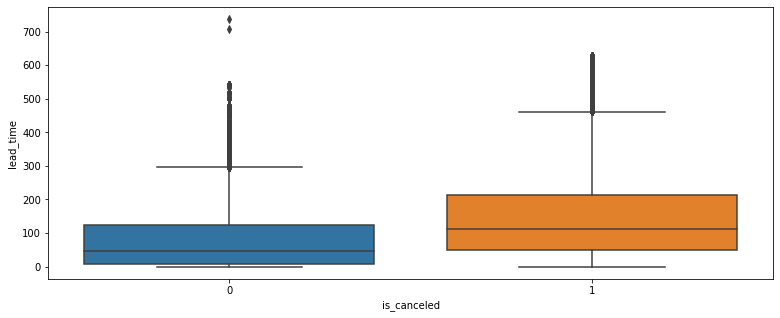

In [ ]:
# Based on the boxplot compared is_canceled with lead_time, people with cancelled reservations has more time to come than people with non-cancelled reservations

plt.figure(figsize = (13,5))
sns.boxplot(x = 'is_canceled', y = 'lead_time', data = data);

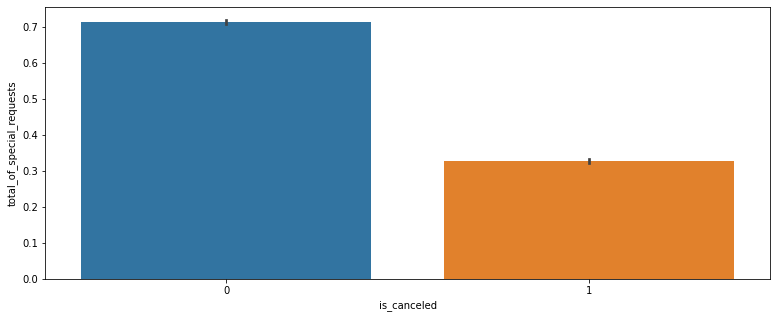

In [ ]:
# Based on the barplot compared is_canceled with total_of_special_requests, people with non-cancelled reservations would request more special requests as they would surely come and plan ahead for vacation

plt.figure(figsize = (13,5))
sns.barplot(x = 'is_canceled', y = 'total_of_special_requests', data = data);

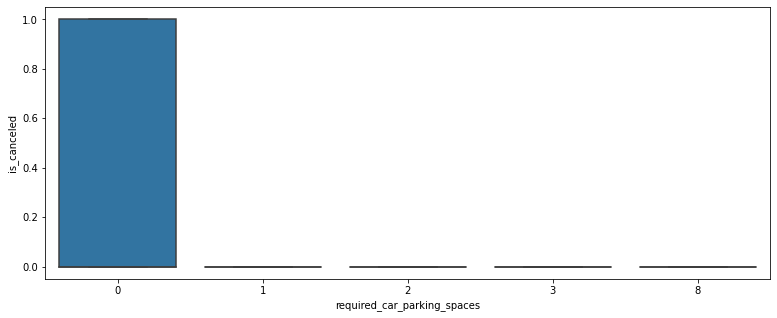

In [ ]:
# Based on the boxplot compared is_canceled with required_car_parking_spaces, people with non-cancelled reservations would always request the parking space at least 1 spot and all people with cancelled reservations would not reserve at all 

plt.figure(figsize = (13,5))
sns.boxplot(x = 'required_car_parking_spaces', y = 'is_canceled', data = data);

In [ ]:
data['required_car_parking_spaces'].value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [ ]:
data[data['required_car_parking_spaces'] == 0]['is_canceled'].value_counts()

0    67750
1    44224
Name: is_canceled, dtype: int64

In [ ]:
data[data['required_car_parking_spaces'] > 0]['is_canceled'].value_counts()

0    7416
Name: is_canceled, dtype: int64

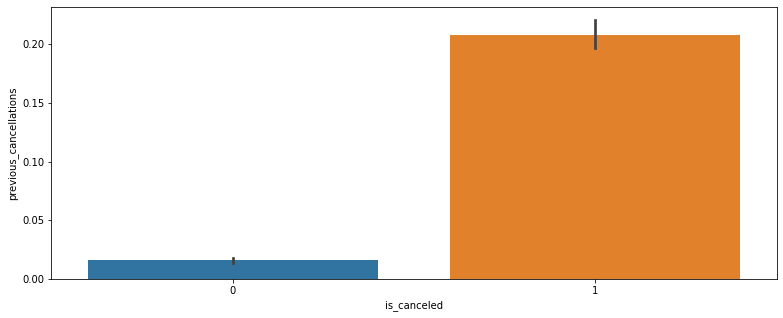

In [ ]:
# Based on the boxplot compared is_canceled with previous_cancellations, people with previous cancellations would end up cancel reservations again with over 90 % 

plt.figure(figsize = (13,5))
sns.barplot(x = 'is_canceled', y = 'previous_cancellations', data = data);

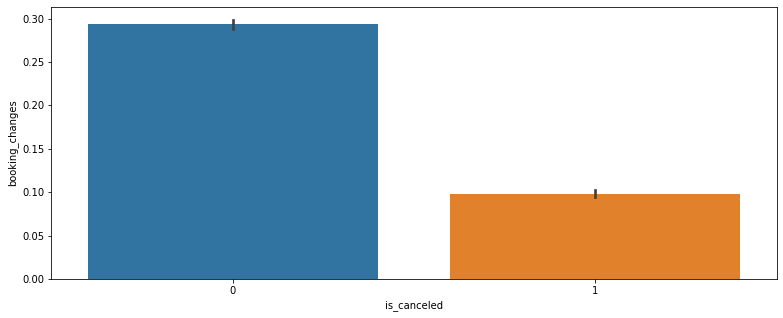

In [ ]:
# Based on the boxplot compared is_canceled with required_car_parking_spaces, people with non-cancelled reservations would make a lot of changes before coming with great amount compared to people with cancelled reservations

plt.figure(figsize = (13,5))
sns.barplot(x = 'is_canceled', y = 'booking_changes', data = data);

# <-- End Data Analysis Using Exploratory -->>

In [ ]:
# <--Data Prediction Using Logistic Regression -->>

# Begin to make future reservations based on is_canceled column on what requests the customer would normally make no matter if the reservation is canceled or not
# Focus on is_canceled column => Would use all columns which have close correlation
data_new = data.copy()[['lead_time', 'total_of_special_requests', 'required_car_parking_spaces', 'booking_changes', 'previous_cancellations', 'is_canceled']]
display(data_new.head())

,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations,is_canceled
0,342,0,0,3,0,0
1,737,0,0,4,0,0
2,7,0,0,0,0,0
3,13,0,0,0,0,0
4,14,1,0,0,0,0


In [ ]:
# Separate features and labels of is_canceled column and split data into train and test sets with only 20 percent of this new data
# Since this data is completely random, there is no need for shuffle 
x = data_new.drop(['is_canceled'], axis = 1)
y = data_new['is_canceled']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, shuffle = False)

In [ ]:
# Train the model and predict the result
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
result = logistic_regression.predict(x_test)

# Output the first 10 predicted demands customer would make
sample_result = x_test.iloc[:10]
display(sample_result)

,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations
95512,320,1,0,0,0
95513,320,1,0,0,0
95514,320,0,0,1,0
95515,320,1,0,0,0
95516,320,1,0,0,0
95517,320,0,0,1,0
95518,17,0,0,1,0
95519,320,1,0,0,0
95520,7,1,0,0,0
95521,320,1,0,0,0


In [ ]:
# Accuracy of model
logistic_regression.score(x_train, y_train)

0.7006449451377837

In [ ]:
logistic_regression.score(x_test, y_test)

0.7387134600887847